In [41]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import shapiro
import seaborn as sns

In [4]:
# Lendo Arquivo CSV 
StockPrices = pd.read_csv(r'C:/Users/pedro/Desktop/Bases DataCamp/Microsoft.csv', parse_dates=['Date'])
StockPrices.head()

,Date,Open,High,Low,Close,Volume,Adjusted
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828


In [5]:
# Colocando os preços em ordem crescente via coluna Date
StockPrices = StockPrices.sort_values(by='Date')
StockPrices.head()

,Date,Open,High,Low,Close,Volume,Adjusted
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828


In [6]:
# Calculando Retornos diários 
StockPrices['Returns'] = StockPrices['Adjusted'].pct_change()
StockPrices.head()

,Date,Open,High,Low,Close,Volume,Adjusted,Returns
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809,NaN
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345,-0.033780
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851,0.010544
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688,-0.033498
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828,0.013068


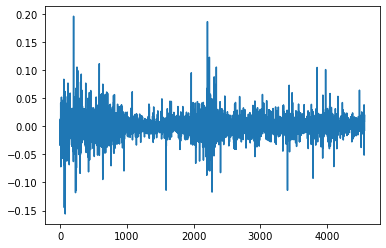

In [9]:
# Plotando coluna dos retornos no Tempo 
StockPrices['Returns'].plot()
plt.show()

In [10]:
# Convertendo Retornos que estão em decimais em % 
percent_return = StockPrices['Returns']*100

In [11]:
# Tirando os valores NA's
returns_plot = percent_return.dropna()

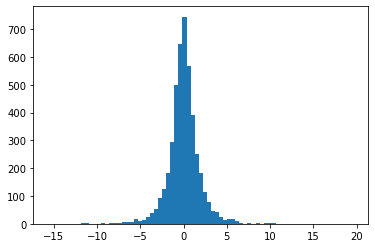

In [12]:
# Plotando os Histogramas 
plt.hist(returns_plot, bins=75)
plt.show()

In [13]:
# Calculando retorno diário médio 
mean_return_daily = np.mean(StockPrices['Returns'])
print(mean_return_daily)

# Calculando o retorno anualizado baseado nos retornos diários 
mean_return_annualized = ((1+mean_return_daily)**252)-1
print(mean_return_annualized)

0.0003777754643575769
0.09985839482852632


In [14]:
# Cálculo do desvio padrão 
sigma_daily = np.std(StockPrices['Returns'])
print(sigma_daily)

# Calculando variância Diária 
variance_daily = sigma_daily**2
print(variance_daily)

0.019341100408708328
0.0003740781650197374


In [15]:
# Desvio Padrão Anualizado
sigma_annualized = sigma_daily * np.sqrt(252)
print(sigma_annualized)

# Variância Anualizada 
variance_annualized = sigma_annualized**2
print(variance_annualized)

0.3070304505826317
0.09426769758497383


In [18]:
# Tirando NA's 
clean_returns = StockPrices['Returns'].dropna()

# Calculando Assimetria dos retornos 
returns_skewness = skew(clean_returns)
print(returns_skewness)

0.21935459193067805


In [23]:
# Calculando excesso de kurtose 
excess_kurtosis = kurtosis(clean_returns)
print(excess_kurtosis)

fourth_moment = excess_kurtosis+3
print(fourth_moment)

10.314572618025519
13.314572618025519


In [25]:
# Teset Shapiro-Wilk para verificar normalidade dos retornos 
shapiro_results = shapiro(clean_returns)
print("Shapiro results:", shapiro_results)

# Resultados do p-Valor 
p_value = shapiro_results[1]
print("P-value: ", p_value)

Shapiro results: ShapiroResult(statistic=0.9003633260726929, pvalue=0.0)
P-value:  0.0


In [63]:
# Importando a Base all-returns
StockReturns = pd.read_csv(r'C:/Users/pedro/Desktop/Bases DataCamp/all-returns.csv').set_index('Date')
StockReturns.head()

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
Date,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811
2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806
2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924
2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585


In [64]:
# Defindo os pesos do portifólio 
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])

# Calculando os retornos ponderados
WeightedReturns = StockReturns.mul(portfolio_weights, axis=1)
WeightedReturns

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
Date,,,,,,,,,
2017-01-03,0.000342,0.001062,0.000558,0.000273,0.000980,0.000507,0.000313,0.002203,0.001843
2017-01-04,-0.000134,-0.000671,-0.000880,-0.000082,0.000166,0.000466,0.000035,0.002192,-0.000930
2017-01-05,0.000610,0.000000,-0.001193,0.000523,-0.000828,0.003073,-0.000625,0.002335,-0.000449
2017-01-06,0.001338,0.001300,-0.000045,-0.000240,0.000010,0.001991,0.000314,0.003179,-0.003188
2017-01-09,0.001099,-0.000477,-0.001320,-0.000009,0.000063,0.000117,-0.000522,0.001690,-0.002014
...,...,...,...,...,...,...,...,...,...
2017-12-22,0.000000,0.000018,0.000114,-0.000333,-0.000317,-0.000545,0.000189,-0.000197,0.000247
2017-12-26,-0.003044,-0.000193,0.000010,-0.000011,-0.000360,0.000719,0.000316,-0.000956,0.000493
2017-12-27,0.000021,0.000545,-0.000076,0.000171,0.000168,0.000467,-0.000316,0.001297,-0.000696


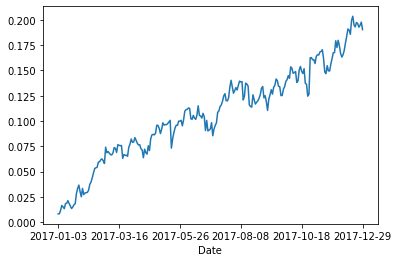

In [65]:
# Calculo do retorno total 
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)

# plotagem dos retornos acumulados ao longo do tempo 
CumulativeReturns = ((1+StockReturns["Portfolio"]).cumprod()-1)
CumulativeReturns.plot()
plt.show()

In [58]:
# Portifólio Equaly Weighted 
# How many stocks are in your portfolio?
numstocks = 9

# Create an array of equal weights across all assets
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)

# Calculate the equally-weighted portfolio returns
StockReturns['Portfolio_EW']=StockReturns.iloc[:, 0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)

array([0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
       0.11111111, 0.11111111, 0.11111111, 0.11111111])

In [94]:
# Create an array of market capitalizations (in billions)
market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 246.09])

# Calculate the market cap weights
mcap_weights = [x for x in market_capitalizations]/sum(market_capitalizations)

# Calculate the market cap weighted portfolio returns
StockReturns['Portfolio_MCap'] = StockReturns.iloc[:, 0:9].mul(mcap_weights, axis=1).sum(axis=1)
StockReturns

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T,Portfolio,Portfolio_MSR,Portfolio_MCap
Date,,,,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521,0.008082,0.009990,0.007132
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811,0.000161,-0.001690,-0.000329
2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806,0.003448,-0.002261,0.003903
2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924,0.004660,-0.007771,0.006068
2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585,-0.001372,-0.004642,-0.000478
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,0.000000,0.000117,0.001431,-0.006664,-0.003524,-0.005448,0.001717,-0.001409,0.001543,-0.000825,-0.001940,-0.001280
2017-12-26,-0.025370,-0.001286,0.000119,-0.000214,-0.004002,0.007190,0.002877,-0.006828,0.003082,-0.003026,-0.000478,-0.004717
2017-12-27,0.000176,0.003630,-0.000953,0.003426,0.001869,0.004674,-0.002869,0.009262,-0.004352,0.001581,-0.000242,0.001854


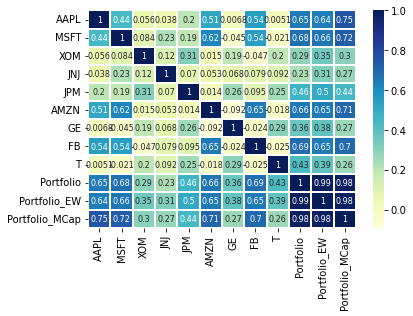

In [43]:
correlation_matrix = StockReturns.corr()

# Create a heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.3,
            annot_kws={"size": 8})

# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

In [87]:
# Calculate the covariance matrix
cov_mat = StockReturns.cov().drop('Portfolio', axis=1).drop(labels='Portfolio')


# Annualize the co-variance matrix
cov_mat_annual = cov_mat*252

# Print the annualized co-variance matrix
print(cov_mat_annual)

                   AAPL      MSFT       XOM       JNJ       JPM      AMZN  \
AAPL           0.030996  0.011400  0.001093  0.000774  0.005716  0.018805   
MSFT           0.011400  0.021912  0.001392  0.003899  0.004597  0.019275   
XOM            0.001093  0.001392  0.012500  0.001548  0.005554  0.000354   
JNJ            0.000774  0.003899  0.001548  0.013092  0.001307  0.001266   
JPM            0.005716  0.004597  0.005554  0.001307  0.026371  0.000474   
AMZN           0.018805  0.019275  0.000354  0.001266  0.000474  0.043954   
GE             0.000236 -0.001315  0.004295  0.001540  0.008283 -0.003830   
FB             0.016243  0.013682 -0.000890  0.001545  0.002631  0.023290   
T              0.000152 -0.000530  0.003751  0.001780  0.006972 -0.000638   
Portfolio_MSR  0.003204  0.002909  0.003995  0.003474  0.013259  0.001409   

                     GE        FB         T  Portfolio_MSR  
AAPL           0.000236  0.016243  0.000152       0.003204  
MSFT          -0.001315  0.013

In [77]:
# Calculate the portfolio standard deviation

portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
portfolio_volatility

0.08931417642713795

In [79]:
# Importando Pesos 
RandomPortfolios = pd.read_csv(r'C:/Users/pedro/Desktop/Bases DataCamp/pesos.csv')
RandomPortfolios

,AAPL weight,MSFT weight,XOM weight,JNJ weight,JPM weight,AMZN weight,GE weight,FB weight,T weight,Returns,Volatility
0,0.000053,0.263110,0.007022,0.040087,0.000027,0.024316,0.355899,0.299400,0.010087,0.127453,0.171565
1,0.042360,0.034922,0.079355,0.043057,0.001435,0.202032,0.225924,0.362324,0.008590,0.138614,0.182723
2,0.207824,0.002132,0.005982,0.041657,0.007498,0.406642,0.064929,0.229260,0.034075,0.155952,0.201185
3,0.096565,0.016775,0.118409,0.037725,0.020013,0.045195,0.512282,0.153015,0.000020,0.118787,0.148958
4,0.131309,0.002733,0.002360,0.047573,0.050633,0.289410,0.313717,0.157123,0.005141,0.138304,0.171473
5,0.030217,0.004305,0.107714,0.029107,0.029903,0.188373,0.269350,0.332927,0.008105,0.142316,0.175777
6,0.007655,0.169038,0.023114,0.032340,0.004398,0.085970,0.263038,0.360287,0.054160,0.142178,0.175248
7,0.169201,0.209762,0.012899,0.021552,0.005978,0.319981,0.227702,0.025310,0.007615,0.143907,0.176766
8,0.268996,0.053900,0.002833,0.025432,0.008408,0.322627,0.148876,0.139105,0.029822,0.149417,0.182563
9,0.021353,0.069281,0.014999,0.036764,0.059347,0.134356,0.309673,0.332525,0.021702,0.142921,0.174062


In [92]:
# Risk free rate
risk_free = 0

# Calculate the Sharpe Ratio for each asset
RandomPortfolios['Sharpe'] = (RandomPortfolios['Returns']-risk_free)/(RandomPortfolios['Volatility'])

In [93]:
# Sort the portfolios by Sharpe ratio
sorted_portfolios = RandomPortfolios.sort_values(by=['Sharpe'], ascending=False)
sorted_portfolios

,AAPL weight,MSFT weight,XOM weight,JNJ weight,JPM weight,AMZN weight,GE weight,FB weight,T weight,Returns,Volatility,Sharpe
38,0.007554,0.005733,0.007244,0.166724,0.382356,0.017941,0.010313,0.011254,0.390882,0.306115,0.134825,2.270462
37,0.085198,0.057888,0.084809,0.243223,0.160696,0.003360,0.003774,0.040424,0.320629,0.251112,0.118428,2.120387
36,0.031254,0.002058,0.072222,0.266291,0.194563,0.049253,0.065227,0.005183,0.313949,0.250674,0.119375,2.099892
35,0.015458,0.017237,0.192526,0.199121,0.198919,0.055857,0.032070,0.004465,0.284346,0.257856,0.124360,2.073460
34,0.123058,0.030525,0.024123,0.228753,0.184660,0.072268,0.008573,0.013285,0.314755,0.251107,0.122065,2.057159
33,0.018652,0.045599,0.166631,0.213154,0.161138,0.043604,0.048968,0.006319,0.295934,0.248434,0.120813,2.056359
32,0.019616,0.057628,0.093644,0.124549,0.230820,0.041911,0.058659,0.058874,0.314298,0.260650,0.127691,2.041260
31,0.057232,0.061136,0.068663,0.192167,0.296906,0.033933,0.028919,0.008426,0.252619,0.268655,0.131689,2.040070
30,0.030006,0.024362,0.190152,0.042507,0.205225,0.021725,0.103489,0.027645,0.354889,0.262003,0.128492,2.039065
29,0.009149,0.007766,0.115405,0.209484,0.256138,0.005153,0.016760,0.118985,0.261160,0.262069,0.128609,2.037719


In [99]:
# Extract the corresponding weights
MSR_weights = sorted_portfolios.iloc[0, 0:9]

# Cast the MSR weights as a numpy array
MSR_weights_array = np.array(MSR_weights)

# Calculate the MSR portfolio returns
StockReturns['Portfolio_MSR'] = StockReturns.iloc[:, 0:9].mul(MSR_weights_array, axis=1).sum(axis=1)
StockReturns

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T,Portfolio,Portfolio_MSR,Portfolio_MCap
Date,,,,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521,0.008082,0.009990,0.007132
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811,0.000161,-0.001690,-0.000329
2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806,0.003448,-0.002261,0.003903
2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924,0.004660,-0.007771,0.006068
2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585,-0.001372,-0.004642,-0.000478
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,0.000000,0.000117,0.001431,-0.006664,-0.003524,-0.005448,0.001717,-0.001409,0.001543,-0.000825,-0.001940,-0.001280
2017-12-26,-0.025370,-0.001286,0.000119,-0.000214,-0.004002,0.007190,0.002877,-0.006828,0.003082,-0.003026,-0.000478,-0.004717
2017-12-27,0.000176,0.003630,-0.000953,0.003426,0.001869,0.004674,-0.002869,0.009262,-0.004352,0.001581,-0.000242,0.001854


In [102]:
def plot_cumulative_returns(df, columns):
    # Calculate the cumulative returns for each column
    cumulative_returns = pd.DataFrame()
    for column in columns:
        cumulative_returns[column] = (1 + df[column]).cumprod()
    
    # Set plot style
    sns.set_style('darkgrid')

    # Create line plot
    fig, ax = plt.subplots(figsize=(10, 6))
    cumulative_returns.plot(ax=ax, linewidth=2.5)

    # Set plot title and axis labels
    ax.set_title('Cumulative Returns', fontsize=16)
    ax.set_xlabel('Time', fontsize=14)
    ax.set_ylabel('Cumulative Return', fontsize=14)

    # Format y-axis ticks as percentages
    ax.yaxis.set_major_formatter('{x:.0%}')

    # Show the plot
    plt.show()

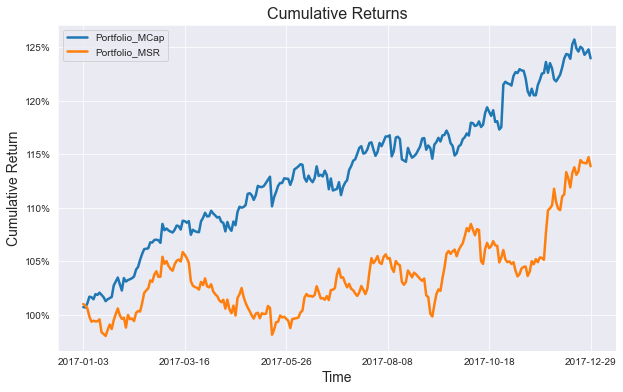

In [103]:
# Plot the cumulative returns
plot_cumulative_returns(StockReturns,['Portfolio_MCap', 'Portfolio_MSR'])

In [104]:
# Sort the portfolios by volatility
sorted_portfolios = RandomPortfolios.sort_values(by=['Volatility'], ascending=True)
sorted_portfolios

,AAPL weight,MSFT weight,XOM weight,JNJ weight,JPM weight,AMZN weight,GE weight,FB weight,T weight,Returns,Volatility,Sharpe
27,0.086586,0.015225,0.045223,0.340999,0.028686,0.034818,0.069759,0.018798,0.359906,0.218121,0.111670,1.953259
24,0.038888,0.088030,0.051177,0.351303,0.029853,0.067092,0.050650,0.008557,0.314450,0.215591,0.114129,1.889008
25,0.055276,0.128182,0.103368,0.342727,0.020867,0.008434,0.002396,0.044546,0.294205,0.218556,0.114869,1.902661
19,0.145399,0.065250,0.058789,0.278565,0.003622,0.000904,0.134288,0.027738,0.285445,0.196002,0.114976,1.704713
21,0.081322,0.106611,0.048776,0.320338,0.050057,0.005625,0.088308,0.034961,0.264002,0.208321,0.115262,1.807362
22,0.089644,0.044089,0.114276,0.258648,0.053039,0.036644,0.115701,0.020322,0.267636,0.209499,0.115424,1.815035
23,0.050343,0.049276,0.061947,0.364314,0.018871,0.071619,0.011959,0.065184,0.306488,0.214583,0.115506,1.857764
28,0.095508,0.023499,0.091694,0.329482,0.092723,0.039612,0.006892,0.048433,0.272157,0.227841,0.115615,1.970679
26,0.024321,0.044714,0.003673,0.307706,0.056154,0.001024,0.062753,0.126369,0.373286,0.223496,0.115624,1.932964
20,0.046151,0.058439,0.089947,0.220340,0.024723,0.047716,0.184019,0.023658,0.305006,0.200854,0.115662,1.736565


In [105]:
# Extract the corresponding weights
GMV_weights = sorted_portfolios.iloc[0, 0:9]

# Cast the GMV weights as a numpy array
GMV_weights_array = np.array(GMV_weights)

# Calculate the GMV portfolio returns
StockReturns['Portfolio_GMV'] = StockReturns.iloc[:, 0:numstocks].mul(GMV_weights_array, axis=1).sum(axis=1)
StockReturns

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T,Portfolio,Portfolio_MSR,Portfolio_MCap,Portfolio_GMV
Date,,,,,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521,0.008082,0.009990,0.007132,0.007665
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811,0.000161,-0.001690,-0.000329,-0.002782
2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806,0.003448,-0.002261,0.003903,0.003048
2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924,0.004660,-0.007771,0.006068,-0.006411
2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585,-0.001372,-0.004642,-0.000478,-0.004633
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,0.000000,0.000117,0.001431,-0.006664,-0.003524,-0.005448,0.001717,-0.001409,0.001543,-0.000825,-0.001940,-0.001280,-0.001848
2017-12-26,-0.025370,-0.001286,0.000119,-0.000214,-0.004002,0.007190,0.002877,-0.006828,0.003082,-0.003026,-0.000478,-0.004717,-0.000967
2017-12-27,0.000176,0.003630,-0.000953,0.003426,0.001869,0.004674,-0.002869,0.009262,-0.004352,0.001581,-0.000242,0.001854,-0.000180


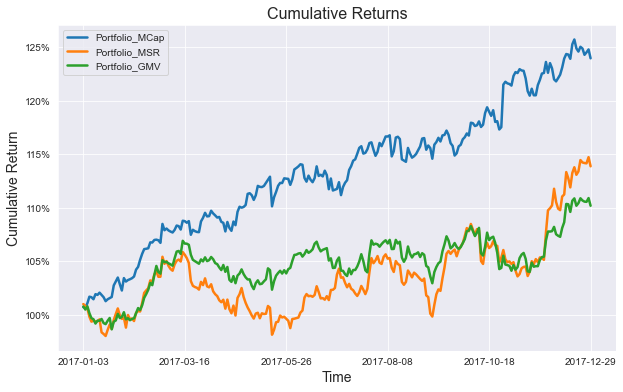

In [108]:
# Plot the cumulative returns
plot_cumulative_returns(StockReturns,['Portfolio_MCap', 'Portfolio_MSR', 'Portfolio_GMV'])

In [109]:
# Importando Base
oil_base = pd.read_csv(r'C:/Users/pedro/Desktop/Bases DataCamp/oil.csv')
oil_base

,Date,USO
0,2007-01-03,-0.042636
1,2007-01-04,-0.040688
2,2007-01-05,0.009285
3,2007-01-08,-0.007109
4,2007-01-09,-0.004001
...,...,...
2764,2017-12-22,0.001718
2765,2017-12-26,0.024871
2766,2017-12-27,-0.002510
2767,2017-12-28,0.004195


In [113]:
# Fazendo Simulações de Monte Carlo
mu = np.mean(oil_base)
vol = np.std(oil_base)
T = 252
S0 = 10

# Add one to the random returns
rand_rets = np.random.normal(mu,vol,T) + 1

# Forecasted random walk
forecasted_values_1 = S0 * rand_rets.cumprod()
forecasted_values = pd.DataFrame(forecasted_values_1)

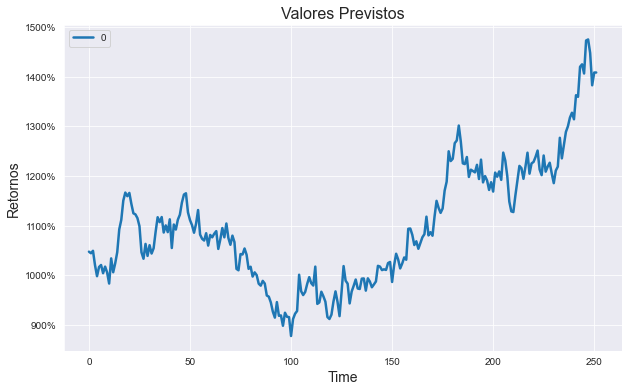

In [114]:
# Set plot style
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(10, 6))
forecasted_values.plot(ax=ax, linewidth=2.5)

ax.set_title('Valores Previstos', fontsize=16)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Retornos', fontsize=14)
ax.yaxis.set_major_formatter('{x:.0%}')
plt.show()

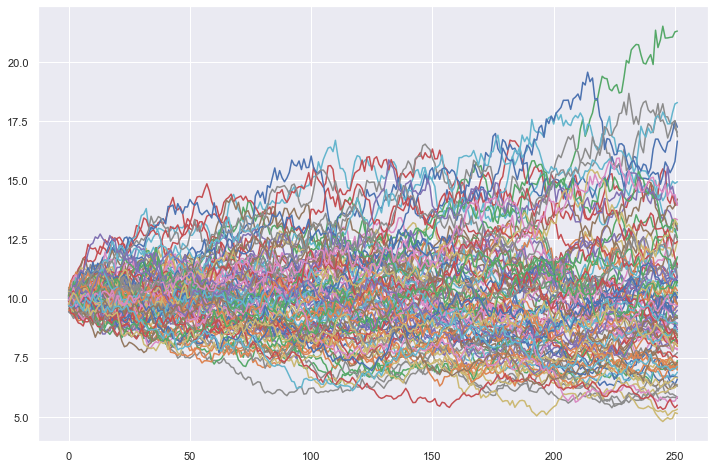

In [124]:
# Loop through 100 simulations
for i in range(0,100):

    # Generate the random returns
    rand_rets = np.random.normal(mu, vol, T) + 1
    
    # Create the Monte carlo path
    forecasted_values = S0*(rand_rets).cumprod()
    
    # Plot the Monte Carlo path
    plt.plot(range(T), forecasted_values)

# Show the simulations
plt.show()